In [1]:
import requests
import matplotlib.pyplot as plt
def getGithubUserRepos( uname ):
    return "https://api.github.com/users/" + uname + "/repos"

In [2]:
myUsername = "zigpot"
myGithubUserRepoRequest = getGithubUserRepos(myUsername)

In [3]:
# TODO: Overcome low rate limit using authentication, ref: https://docs.github.com/en/apps/creating-github-apps/creating-github-apps/rate-limits-for-github-apps
response = requests.get(myGithubUserRepoRequest)

In [8]:
# TODO: Handle response error (using try catch)
def getLangsStat(response):
    langs = {}
    if(response.status_code == 200):
        print("success!")
        print(response.json())
        for item in response.json():
            langResponse = requests.get(item['languages_url']);
            if(langResponse.status_code == 200):
                print(langs)
                A = langs
                B = langResponse.json()
                c = {x: A.get(x, 0) + B.get(x, 0) for x in set(A).union(B)}
                langs = c
    else:
        # TODO: response error
        print("failed with status code: ", response.status_code)
        print(response.reason)
    return langs

failed with status code:  403
rate limit exceeded


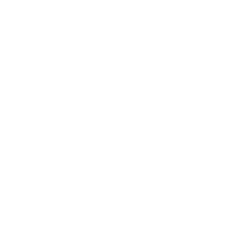

{}


In [9]:
langs = getLangsStat(response)

langsLabels = list(langs.keys())
langsValues = list(langs.values())

#TODO github language colors, ref: https://github.com/ozh/github-colors

plt.pie(langsValues, labels=langsLabels)
plt.show()

sortedLangsRev = dict(sorted(langs.items(), key = lambda x: x[1], reverse=True))
print(sortedLangsRev)